### POP of LME with simplest Hamiltonian and dissipator

In [1]:
using DynamicPolynomials
using LinearAlgebra
include("LiPoSID.jl")

Main.LiPoSID

$
    \frac{d\rho}{dt} = -\frac{i}{\hbar} [H,\rho(t)] + \mathcal{D}[\rho(t)] = - \frac{i}{\hbar}[H, \rho]+\sum_{\ell=1}^{s-1}\left[A_\ell \rho A_\ell^\dagger - \frac{1}{2}\left\{ A_\ell^\dagger A_\ell, \rho \right\} \right]
$


$
    H = \begin{pmatrix} e_1 & d_1 + i d_2\\ d_1 - i d_2 & 0
   \end{pmatrix}
$


$
A = \begin{pmatrix} a_1 + i b_1 & a_2 + i b_2\\ a_3 + i b_3 & - a_1 - i b_1
   \end{pmatrix}$

In [150]:
using DynamicPolynomials

@polyvar e[1:2]
@polyvar d[1:2]

#    Hˢʸᵐᵇ = [ e[1]               d[1] + im*d[2]
#              d[1] - im*d[2]     0.             ]


    Hˢʸᵐᵇ = [ e[1]   0
              0      0.]



@polyvar a[1:4]
@polyvar b[1:4]

#    Aˢʸᵐᵇ = [ a[1] + im*b[1]           a[2] + im*b[2]
#              a[3] + im*b[3]           a[4] + im*b[4]   ]

    Aˢʸᵐᵇ = [ a[1] + im*b[1]           a[2] + im*b[2]
              a[3] + im*b[3]          -a[1] - im*b[1]   ]


2×2 Matrix{Polynomial{true, Complex{Int64}}}:
 a₁ + (0+1im)b₁  a₂ + (0+1im)b₂
 a₃ + (0+1im)b₃  -a₁ + (0-1im)b₁

In [151]:
parentdir = pwd()
data_dir = parentdir*"\\DATA\\"

"C:\\Users\\Zakhar\\Documents\\GitHub\\POP_fail\\DATA\\"

In [152]:
#γᵗˣᵗ = "7.9477"
γᵗˣᵗ = "0.079477"

ρᵍ, tᵍ = LiPoSID.get_rho_series(data_dir*"State_B1_2CUT_data.h5", γᵗˣᵗ)
ρᵉ, tᵉ = LiPoSID.get_rho_series(data_dir*"State_B2_2CUT_data.h5", γᵗˣᵗ)
ρˣ, tˣ = LiPoSID.get_rho_series(data_dir*"State_B3_2CUT_data.h5", γᵗˣᵗ)
ρʸ, tʸ = LiPoSID.get_rho_series(data_dir*"State_B4_2CUT_data.h5", γᵗˣᵗ)

@assert tᵍ == tᵉ == tˣ == tʸ 

t = convert(Vector{Float64}, tᵉ)
@assert maximum(diff(t)) ≈ minimum(diff(t)) ≈ t[2]-t[1]
Δt = t[2]-t[1]
t_steps = length(t)

1256

$
 L^{(Lindblad)}
= \sum_{i=1}^N {
{\left\|
\rho_{(i)} - \rho_{(i-2)}
- {\mathcal{L}} \left[\int^{t_i}_{t_{i-2}}\rho(t)dt \right] \right\| }^2_F }
$

$
\int^{t_i}_{t_{i-2}}\rho(t)dt = \frac{1}{3} \Delta t \left[ {\rho(t_{i-2}) + 4 \rho(t_{i-1}) + \rho(t_i)} \right] +  \mathcal{O}(\Delta t^5). \label{eq:simpson}
$

In [153]:
obj_simp = 0

for ρ in [ρᵍ, ρᵉ, ρˣ, ρʸ]

    # Convert cut ρ series:
    ρ = convert(Vector{Matrix{ComplexF64}}, ρ)

    obj_simp += LiPoSID.simpson_obj(ρ, t,  Hˢʸᵐᵇ, [Aˢʸᵐᵇ])

end # of files (initial states) loop 


In [154]:
obj_simp

3.1796954746881942a₁⁴ - 0.013938441211284344a₁³a₂ + 0.013509761228743686a₁³a₃ - 0.013452739566579244a₁³b₂ - 0.018880717674252877a₁³b₃ + 10.940820302933638a₁²a₂² - 27.278937190981075a₁²a₂a₃ + 0.013452739566579244a₁²a₂b₁ - 0.0012575996083348737a₁²a₂b₂ - 0.0037727988250046275a₁²a₂b₃ + 29.16440169903429a₁²a₃² + 0.018880717674252877a₁²a₃b₁ + 0.0037727988250046275a₁²a₃b₂ + 0.0012575996083348737a₁²a₃b₃ + 6.3593909493763885a₁²b₁² - 0.013938441211284344a₁²b₁b₂ + 0.013509761228743686a₁²b₁b₃ + 10.940904373368438a₁²b₂² + 27.279441613589867a₁²b₂b₃ + 29.164485769469103a₁²b₃² - 0.007022805603459752a₁a₂³ + 0.006808465612189406a₁a₂²a₃ + 0.0012575996083348737a₁a₂²b₁ - 0.006047872519830426a₁a₂²b₂ - 0.008761861573667231a₁a₂²b₃ - 0.006915635607824613a₁a₂a₃² - 0.013938441211284344a₁a₂b₁² - 0.00016814086959842539a₁a₂b₁b₂ - 54.558378804570964a₁a₂b₁b₃ - 0.007022805603459752a₁a₂b₂² - 0.006915635607824613a₁a₂b₃² + 0.006701295616554283a₁a₃³ - 0.0012575996083348737a₁a₃²b₁ - 0.0074048670467488364a₁a₃²b₂ - 0.0101188

In [155]:
solution_simp_n, best_method_simp_n = LiPoSID.sos_min_newton(obj_simp) 

************************TSSOS************************
TSSOS is launching...
optimum = 0.0005505821371892873
The local solver failed!
No higher TSSOS hierarchy!
************************TSSOS************************
TSSOS is launching...
optimum = 0.000550442068907667
Found a local optimal solution giving an upper bound: 0.011857047039541158 and a relative optimality gap: 0.01130660497063349.
No higher TSSOS hierarchy!


(PolyVar{true}[e₁, a₁, a₂, a₃, b₁, b₂, b₃] => [25.126072080406704, -2.6744895600314484e-16, -2.363837965291739e-14, -6.517617601754702e-16, -7.201663784657451e-16, 1.1532392265240086e-15, -1.578474954452621e-17], "scaled_tssos")

In [156]:
best_method_simp_n

"scaled_tssos"

In [157]:
Hˢⁱᵈ = subs(Hˢʸᵐᵇ, solution_simp_n)

2×2 Matrix{Term{true, Float64}}:
 25.1261  0.0
 0.0      0.0

In [158]:
Lⁿ = subs(Aˢʸᵐᵇ, solution_simp_n)

2×2 Matrix{Polynomial{true, ComplexF64}}:
 (-2.67449e-16-7.20166e-16im)  (-2.36384e-14+1.15324e-15im)
 (-6.51762e-16-1.57847e-17im)  (2.67449e-16+7.20166e-16im)

In [159]:
Lⁿ - [ Lⁿ[1,1] 0 
        0      Lⁿ[2,2]]

2×2 Matrix{Polynomial{true, ComplexF64}}:
 0.0+0.0im                     (-2.36384e-14+1.15324e-15im)
 (-6.51762e-16-1.57847e-17im)  0.0+0.0im

In [160]:
println("γ = "*string(γᵗˣᵗ)*" POP Simpson: ")

solution_simp, best_method_simp = LiPoSID.sos_min(obj_simp) 

println(" Best method: ", best_method_simp)


γ = 0.079477 POP Simpson: 
************************TSSOS************************
TSSOS is launching...
optimum = 0.0005507475158826648
Global optimality certified!
No higher TSSOS hierarchy!
************************TSSOS************************
TSSOS is launching...
optimum = 0.0005504524207799907
The local solver failed!
No higher TSSOS hierarchy!
 Best method: tssos


In [161]:
Hˢⁱᵈ = subs(Hˢʸᵐᵇ, solution_simp)

2×2 Matrix{Term{true, Float64}}:
 25.1261  0.0
 0.0      0.0

In [162]:
 L = subs(Aˢʸᵐᵇ, solution_simp)

2×2 Matrix{Polynomial{true, ComplexF64}}:
 (-0.000140815-2.82519e-5im)  (0.208178+0.204772im)
 (0.0438524+0.0491218im)      (0.000140815+2.82519e-5im)

In [163]:
a¹ = (L[1,1] + L[2,2])/2

0.0 + 0.0im

In [164]:
 L - a¹*I

2×2 Matrix{Polynomial{true, ComplexF64}}:
 (-0.000140815-2.82519e-5im)  (0.208178+0.204772im)
 (0.0438524+0.0491218im)      (0.000140815+2.82519e-5im)

In [165]:
Hˢⁱᵈ - (a¹'*L - a¹*L') 

2×2 Matrix{Polynomial{true, ComplexF64}}:
 (25.1261+0.0im)  0.0+0.0im
 0.0+0.0im        0.0+0.0im

In [166]:
Hˢⁱᵈ = subs(Hˢʸᵐᵇ, solution_simp)
γˢⁱᵈ = subs(γ, solution_simp)

LoadError: UndefVarError: γ not defined

In [11]:
Hˢⁱᵈ

2×2 Matrix{Term{true, Float64}}:
 24.9459  0.0
 0.0      0.0

In [12]:
γˢⁱᵈ

6.50865397406651

In [13]:
@polyvar γˢʸᵐᵇ
@polyvar Eˢʸᵐᵇ

Hˢʸᵐᵇ  = [ Eˢʸᵐᵇ   0
           0       0.  ]

Eˢⁱᵈ = []
γˢⁱᵈ = []

γᵗˣᵗ = [ "0.079477", "0.25133", "0.79477", "2.5133", "7.9477", "25.133", "79.477", "251.33"]

@time for γᵢᵗˣᵗ in γᵗˣᵗ
    
    println("γ = ", γᵢᵗˣᵗ)
    
    ρᵍ, tᵍ = LiPoSID.get_rho_series(data_dir*"State_B1_2CUT_data.h5", γᵢᵗˣᵗ)
    ρᵉ, tᵉ = LiPoSID.get_rho_series(data_dir*"State_B2_2CUT_data.h5", γᵢᵗˣᵗ)
    ρˣ, tˣ = LiPoSID.get_rho_series(data_dir*"State_B3_2CUT_data.h5", γᵢᵗˣᵗ)
    ρʸ, tʸ = LiPoSID.get_rho_series(data_dir*"State_B4_2CUT_data.h5", γᵢᵗˣᵗ)
    
    tˢᵗᵉᵖₘₐₓ = min(length(ρᵍ), length(ρᵉ), length(ρˣ), length(ρʸ)) 

    @assert tᵍ[1:tˢᵗᵉᵖₘₐₓ] == tᵉ[1:tˢᵗᵉᵖₘₐₓ] == tˣ[1:tˢᵗᵉᵖₘₐₓ] == tʸ[1:tˢᵗᵉᵖₘₐₓ] 
    t = convert(Vector{Float64}, tᵉ)
    @assert maximum(diff(t)) ≈ minimum(diff(t)) ≈ t[2]-t[1]
    
    obj_simp = 0

    for ρ in [ρᵍ[1:tˢᵗᵉᵖₘₐₓ], ρᵉ[1:tˢᵗᵉᵖₘₐₓ], ρˣ[1:tˢᵗᵉᵖₘₐₓ], ρʸ[1:tˢᵗᵉᵖₘₐₓ]]

        ρ = convert(Vector{Matrix{ComplexF64}}, ρ)
        obj_simp += simpson_obj(ρ, t, Hˢʸᵐᵇ, γˢʸᵐᵇ)

    end # of files (initial states) loop 
    
    solution_simp, best_method_simp = LiPoSID.sos_min_newton(p::Polynomial)
    
    push!(Eˢⁱᵈ, subs(Eˢʸᵐᵇ, solution_simp))
    push!(γˢⁱᵈ, subs(γˢʸᵐᵇ, solution_simp))
    
    println()

end # of loop over γ

γ = 0.079477
************************TSSOS************************
TSSOS is launching...
optimum = 0.00130681725276181
Global optimality certified!
No higher TSSOS hierarchy!
************************TSSOS************************
TSSOS is launching...
optimum = 0.001306817602495261
Global optimality certified!
No higher TSSOS hierarchy!

γ = 0.25133
************************TSSOS************************
TSSOS is launching...
optimum = 0.0017017434218405214
Global optimality certified!
No higher TSSOS hierarchy!
************************TSSOS************************
TSSOS is launching...
optimum = 0.0017017145913764446
Global optimality certified!
No higher TSSOS hierarchy!

γ = 0.79477
************************TSSOS************************
TSSOS is launching...
optimum = 0.0019686641292360053
Global optimality certified!
No higher TSSOS hierarchy!
************************TSSOS************************
TSSOS is launching...
optimum = 0.0019686565505855425
Global optimality certified!
No high

In [14]:
Eˢⁱᵈ

8-element Vector{Any}:
 25.126070689179826
 25.1406843838957
 25.15815760931009
 25.208428877267664
 24.94593167439421
 7.257337363109745
 -0.7329197799499009
 0.14057888095714755

In [41]:
plot(convert.(Float64, Eˢⁱᵈ[1:5]), label ="E")
xticks!(1:5, γᵗˣᵗ[1:5])


In [15]:
γˢⁱᵈ

8-element Vector{Any}:
 0.07948797558989283
 0.25097922988537497
 0.7901268450104175
 2.439988583444001
 6.50865397406651
 7.28576260895405
 -0.22100759269822587
 -0.10277927073883482

In [16]:
γᵗˣᵗ

8-element Vector{String}:
 "0.079477"
 "0.25133"
 "0.79477"
 "2.5133"
 "7.9477"
 "25.133"
 "79.477"
 "251.33"

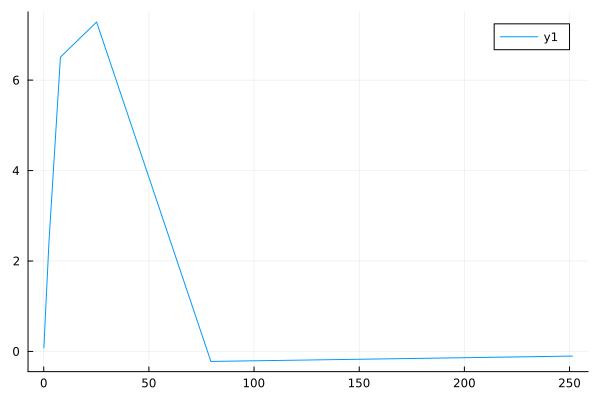

In [17]:
using Plots

plot(parse.(Float64, γᵗˣᵗ), convert.(Float64, γˢⁱᵈ))

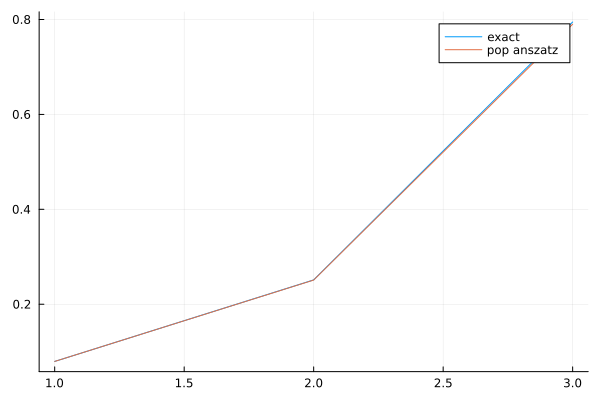

In [18]:
plot(parse.(Float64, γᵗˣᵗ[1:3]), label ="exact")
plot!(convert.(Float64, γˢⁱᵈ[1:3]), label="pop anszatz")

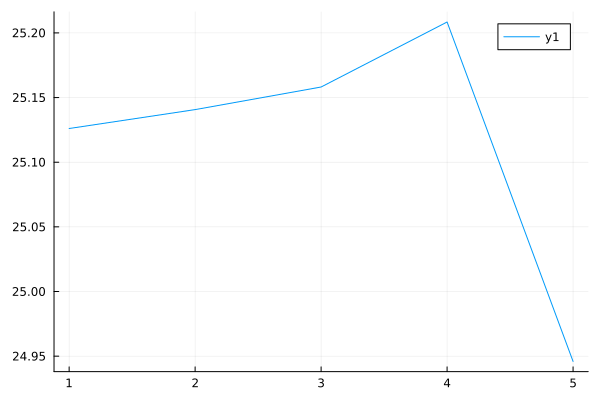

In [19]:
plot(convert.(Float64, Eˢⁱᵈ[1:5]))

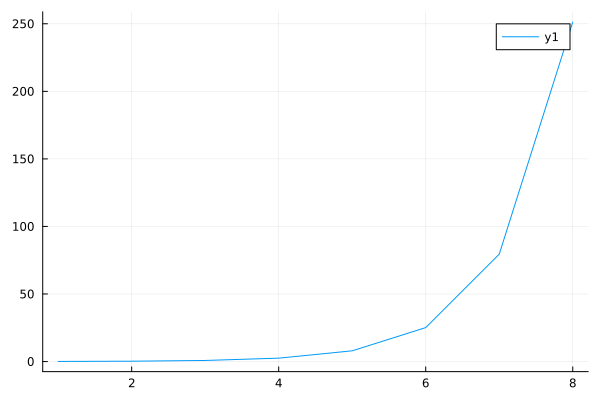

In [20]:
plot(parse.(Float64, γᵗˣᵗ))

In [21]:
plot(γˢⁱᵈ - parse.(Float64, γᵗˣᵗ))

LoadError: Cannot convert Polynomial{true, Float64} to series data for plotting

In [22]:
using Pickle

In [23]:
store("gamma_sid.pkl", convert(Vector{Float64}, γˢⁱᵈ))

In [24]:
store("energy_sid.pkl", convert(Vector{Float64}, Eˢⁱᵈ))

In [25]:
store("gamma_txt.pkl", γᵗˣᵗ)

In [26]:
i = 5
γᵢᵗˣᵗ = γᵗˣᵗ[i]

ρᵍ, tᵍ = LiPoSID.get_rho_series(data_dir*"State_B1_2CUT_data.h5", γᵢᵗˣᵗ)
ρᵉ, tᵉ = LiPoSID.get_rho_series(data_dir*"State_B2_2CUT_data.h5", γᵢᵗˣᵗ)
ρˣ, tˣ = LiPoSID.get_rho_series(data_dir*"State_B3_2CUT_data.h5", γᵢᵗˣᵗ)
ρʸ, tʸ = LiPoSID.get_rho_series(data_dir*"State_B4_2CUT_data.h5", γᵢᵗˣᵗ)

t = convert(Vector{Float64}, tᵉ)

bᵍ = LiPoSID.bloch(ρᵍ)
bᵉ = LiPoSID.bloch(ρᵉ)
bˣ = LiPoSID.bloch(ρˣ)
bʸ = LiPoSID.bloch(ρʸ)

3×1409 Matrix{Float64}:
  0.798799   0.800323   0.801716  …   0.0464075   0.0468722   0.0473314
 -0.126524  -0.116034  -0.105566     -0.0371923  -0.0367637  -0.0363303
  0.129272   0.131454   0.133628      0.889586    0.889592    0.889598

In [27]:
using QuantumOptics

basis = NLevelBasis(2)

function Lindblad_time_evolution(basis, ρ₀, time_span, H, J)
         
    ρ₀ = DenseOperator(basis, Hermitian(ρ₀)) 
    # H = DenseOperator(basis, H) # reconstructed Hamiltonian of the system
    H = DenseOperator(basis, convert(Matrix{ComplexF64}, H[:,:,1]) ) # !!!!!!
    J = [ DenseOperator(basis, Jᵢ) for Jᵢ in J ] # reconstracted Lindblad decipators
    
    time, ρ  = timeevolution.master(time_span, ρ₀, H, J)
    
    ρ = [ρₜ.data for ρₜ in ρ]

end

Lindblad_time_evolution (generic function with 1 method)

In [28]:
H = [ Eˢⁱᵈ[i]  0
      0        0 ]

γᵢˢⁱᵈ = convert(Float64, γˢⁱᵈ[i])

J = [ 0    √γᵢˢⁱᵈ
      0     0            ]

ρᵍₛᵢ = Lindblad_time_evolution(basis, ρᵍ[1], t, H, [J])
ρᵉₛᵢ = Lindblad_time_evolution(basis, ρᵉ[1], t, H, [J])
ρˣₛᵢ = Lindblad_time_evolution(basis, ρˣ[1], t, H, [J])
ρʸₛᵢ = Lindblad_time_evolution(basis, ρʸ[1], t, H, [J])

bᵍₛᵢ = LiPoSID.bloch(ρᵍₛᵢ)
bᵉₛᵢ = LiPoSID.bloch(ρᵉₛᵢ)
bˣₛᵢ = LiPoSID.bloch(ρˣₛᵢ)
bʸₛᵢ = LiPoSID.bloch(ρʸₛᵢ)

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to 

3×1409 Matrix{Float64}:
  0.798799   0.799014   0.799102   0.799063   …   0.00929037   0.0102884
 -0.126524  -0.116361  -0.106213  -0.0960817     -0.0814189   -0.0811646
  0.129272   0.132101   0.134921   0.137731       0.99106      0.991089

In [29]:
using Plots

In [30]:
function xyz(b)
    x = b[1,:]
    y = b[2,:]
    z = b[3,:]
    return x,y,z
end

xyz (generic function with 1 method)

In [31]:
Plots.plotlyjs()
plt = Plots.plot(xyz(bˣₛᵢ), label = "SID")
plt = Plots.plot!(xyz(bˣ), label = "exact")

WebIO._IJuliaInit()

In [32]:
γᵢˢⁱᵈ

6.50865397406651

In [33]:
plot(γˢⁱᵈ)

LoadError: Cannot convert Term{true, Float64} to series data for plotting